# Notebook to gather and analyse results for frontier orbitals

Calculations are already assumed to have been checked for convergence

In [1]:
# define useful constants
Ha2eV = 27.211396132

# define molecules
acenes = ['naphthalene', 'anthracene', 'tetracene', 'pentacene', 'hexacene']
oleds = ['NPh3', 'CBP', '2CzPN', 'ACRFLCN']
molecules = acenes + oleds
molecule_labels = {'naphthalene': 'naphthalene', 'anthracene': 'anthracene',
                   'tetracene': 'tetracene', 'pentacene': 'pentacene', 'hexacene': 'hexacene',
                   'NPh3': 'NPh$_3$', 'CBP': 'CBP', '2CzPN': '2CzPN',
                   'ACRFLCN': 'ACRFLCN'}

# define XC functionals
xcs = ['PBE', 'PBE0']

## HOMO-LUMO spatial separation

In [2]:
lambdat = {}
for mol in molecules:
    lambdat[mol] = {}
    for xc in xcs:
        lambdat[mol][xc] = None

lambdat['naphthalene']['PBE'] = 0.89
lambdat['naphthalene']['PBE0'] = 0.88

lambdat['anthracene']['PBE'] = 0.88
lambdat['anthracene']['PBE0'] = 0.87

lambdat['tetracene']['PBE'] = 0.89
lambdat['tetracene']['PBE0'] = 0.88

lambdat['pentacene']['PBE'] = 0.89
lambdat['pentacene']['PBE0'] = 0.88

lambdat['hexacene']['PBE'] = 0.90
lambdat['hexacene']['PBE0'] = 0.89

lambdat['NPh3']['PBE'] = 0.59
lambdat['NPh3']['PBE0'] = 0.61

lambdat['CBP']['PBE'] = 0.57
lambdat['CBP']['PBE0'] = 0.58

lambdat['2CzPN']['PBE'] = 0.47
lambdat['2CzPN']['PBE0'] = 0.45

lambdat['ACRFLCN']['PBE'] = 0.12
lambdat['ACRFLCN']['PBE0'] = 0.11

## Transition purity

In [3]:
purities = {}
for mol in molecules:
    purities[mol] = {'S1': 0.0, 'T1': 0.0}

purities['naphthalene']['S1'] = 0.93
purities['naphthalene']['T1'] = 0.99

purities['anthracene']['S1'] = 0.96
purities['anthracene']['T1'] = 1.00

purities['tetracene']['S1'] = 0.97
purities['tetracene']['T1'] = 1.00

purities['pentacene']['S1'] = 0.98
purities['pentacene']['T1'] = 1.00

purities['hexacene']['S1'] = 0.98
purities['hexacene']['T1'] = 1.00

purities['NPh3']['S1'] = 0.99
purities['NPh3']['T1'] = 1.00

purities['CBP']['S1'] = 0.97
purities['CBP']['T1'] = 1.00

purities['2CzPN']['S1'] = 0.97
purities['2CzPN']['T1'] = 1.00

purities['ACRFLCN']['S1'] = 1.00
purities['ACRFLCN']['T1'] = 1.00

## Read in energies from BigDFT

In [4]:
from BigDFT import Logfiles as lf
import os
import nwchem

basis_sets = ['VTZ', 'cubic', 'SF_sp_spd_8.0']

occ_orbs = ['HOMO', 'HOMO-1', 'HOMO-2']
virt_orbs = ['LUMO', 'LUMO+1', 'LUMO+2']
orb_list = occ_orbs + virt_orbs

orb_energies = {}
ihs = {}

for mol in molecules:
    orb_energies[mol] = {}
    
    for xc in xcs:
        orb_energies[mol][xc] = {}
        
        for basis in basis_sets:
            orb_energies[mol][xc][basis] = {}
        
            if basis != 'VTZ':
                
                logname = mol+'/log-'+mol+'_'+str(xc)+'_S0_'+basis+'.yaml'                              
                if os.path.isfile(logname):
                    run = lf.Logfile(logname)
                    
                    # doesn't depend on the XC functional, so no problem if we overwrite it
                    ihs[mol] = run.number_of_orbitals
                    for i,orb in enumerate(occ_orbs):
                        orb_energies[mol][xc][basis][orb] = Ha2eV * run.evals[0][0][ihs[mol] - i - 1]
                    for i,orb in enumerate(virt_orbs):
                        orb_energies[mol][xc][basis][orb] = Ha2eV * run.evals[0][0][ihs[mol] + i] 
                    
                    print ('Finished reading '+logname)
                else:
                    print ('No logfile for '+logname)
                    for orb in orb_list:
                        orb_energies[mol][xc][basis][orb] = None

            elif basis == 'VTZ':
                
                logname = mol+'/'+mol+'_'+str(xc)+'_'+basis+'_tda.out'
                f_name = os.path.isfile(logname)
                if f_name: 
                    nwchem_eigs = nwchem.get_homo_lumo_from_nwchem(logname, None, occ_orbs, virt_orbs)
                    
                    for orb in orb_list:
                        orb_energies[mol][xc][basis][orb] = Ha2eV * nwchem_eigs[orb]
                    
                    print ('Finished reading '+logname)
                else:
                    print ('No logfile for '+logname)
                    for orb in orb_list:
                        orb_energies[mol][xc][basis][orb] = None
                 
    print ('')

Finished reading naphthalene/naphthalene_PBE_VTZ_tda.out
Finished reading naphthalene/log-naphthalene_PBE_S0_cubic.yaml
Finished reading naphthalene/log-naphthalene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading naphthalene/naphthalene_PBE0_VTZ_tda.out
Finished reading naphthalene/log-naphthalene_PBE0_S0_cubic.yaml
No logfile for naphthalene/log-naphthalene_PBE0_S0_SF_sp_spd_8.0.yaml

Finished reading anthracene/anthracene_PBE_VTZ_tda.out
Finished reading anthracene/log-anthracene_PBE_S0_cubic.yaml
Finished reading anthracene/log-anthracene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading anthracene/anthracene_PBE0_VTZ_tda.out
Finished reading anthracene/log-anthracene_PBE0_S0_cubic.yaml
No logfile for anthracene/log-anthracene_PBE0_S0_SF_sp_spd_8.0.yaml

Finished reading tetracene/tetracene_PBE_VTZ_tda.out
Finished reading tetracene/log-tetracene_PBE_S0_cubic.yaml
Finished reading tetracene/log-tetracene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading tetracene/tetracene_PBE0_VTZ_tda.out
Finished re

PBE
PBE0


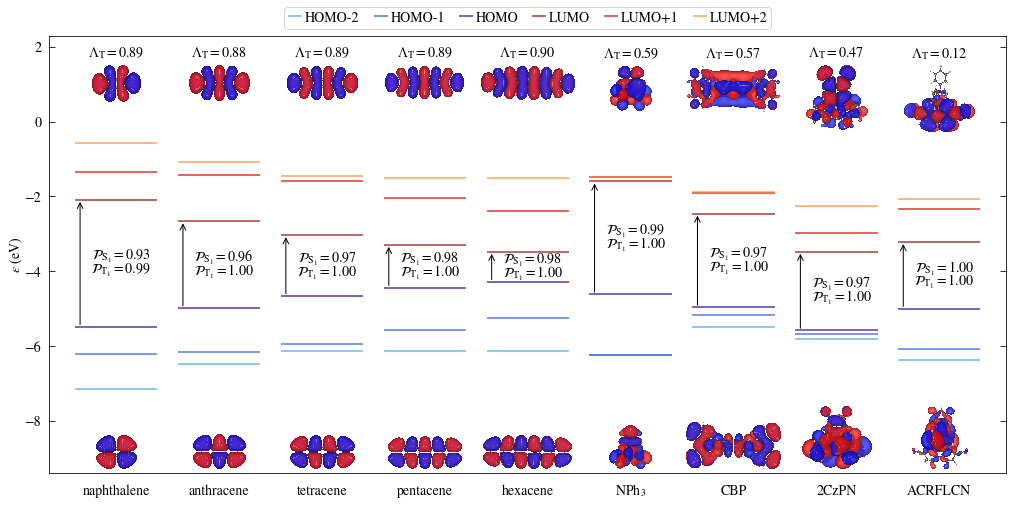

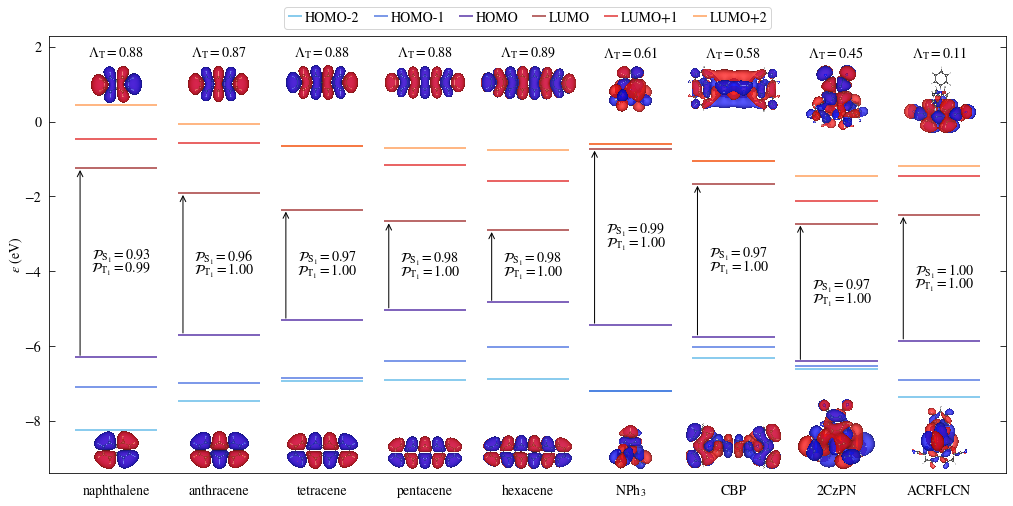

In [5]:
import plotting
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
%matplotlib inline

def plot_homo_lumo(molecules, xc, basis, orb_order, orb_energies, ihs, ct_vals, purities, molecule_labels,
                   emin=0, emax=1, font_size=14, width=3.5, height=3.5,
                   show_lambda=True, show_densities=True, show_purities=False):
    import matplotlib.pyplot as plt 
    from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    plt.rcParams.update({'font.size': plotting.font_size})
    fig, ax = plt.subplots(1, 1, figsize=(width, height))

    erange = emax - emin
    det = 0.003 * erange
    
    xmin = 0
    x = 0
    dx = 0.5
    ddx = 0.05
    de = 2.0
    
    z1 = 0.038
    zoom = {'naphthalene': z1, 'anthracene': z1, 'tetracene': z1, 'pentacene': z1, 'hexacene': z1,
            'NPh3': 0.04, 'CBP': 0.04, '2CzPN': 0.06, 'ACRFLCN': 0.06, 'alpha-NPD': 0.05}
    
    for m,molecule in enumerate(molecules):
        
        if show_densities:
            homo_str = str(ihs[molecule]).zfill(4)
            densities = [{'name': molecule+'/data-'+molecule+'_'+xc+'_S0_cubic/virtual0001.png',
                          'xy': [x + 0.5 * dx, 0.93 * (emax - emin) + emin],
                          'alignment': (0.5, 1.0)},
                         {'name': molecule+'/data-'+molecule+'_'+xc+'_S0_cubic/orbital'+homo_str+'.png',
                          'xy': [x + 0.5 * dx, 0.01 * (emax - emin) + emin],
                          'alignment': (0.5, 0.0)}]
            
            for density in densities:
                img = plt.imread(density['name'])
                imagebox = OffsetImage(img, zoom[molecule])
                imagebox.image.axes = ax
                ab = AnnotationBbox(imagebox, density['xy'], xycoords='data',
                                    frameon=False, box_alignment=density['alignment'])
                ax.add_artist(ab)
        
        yl = - 0.08
        ax.text(x + 0.5 * dx, emin - 0.05 * erange, molecule_labels[molecule], horizontalalignment='center')
        if show_lambda:
            ax.text(x + 0.5 * dx, 0.98 * (emax - emin) + emin, 
                    '$\Lambda_{\mathrm{T}}=$'+'{0:.2f}'.format(ct_vals[molecule][xc]),
                    ha='center', va='top')
             
        for ih,orb in enumerate(orb_order):
            
            e = orb_energies[molecule][xc][basis][orb]

            if m == 0:
                label = orb
            else:
                label = None
           
            if orb == 'HOMO-2':
                color = plotting.colorsb[2]
            elif orb == 'HOMO-1':
                color = plotting.colorsb[1]
            elif orb == 'HOMO':
                color = plotting.colorsb[0]
            elif orb == 'LUMO':
                color = plotting.colorso[0]
            elif orb == 'LUMO+1':
                color = plotting.colorso[1]
            elif orb == 'LUMO+2':
                color = plotting.colorso[2]
                
            ax.hlines(e, x + ddx, x + dx - ddx, linestyles='-', color=color, alpha=0.8, label=label)
        
        if show_purities:
            eh = orb_energies[molecule][xc][basis]['HOMO']
            el = orb_energies[molecule][xc][basis]['LUMO']
            ax.annotate('', xy=(x + 0.15 * dx, eh), xycoords=("data", "data"),
                        xytext=(x + 0.15 * dx, el), arrowprops=dict(arrowstyle="<-", color='k'))
            ax.text(x + 0.55 * dx, (eh + el) * 0.5 + 0.18,
                    '$\mathcal{P}_{\mathrm{S}_1}=$'+'{0:.2f}'.format(purities[molecule]['S1']), 
                    horizontalalignment='center', verticalalignment='center')
            ax.text(x + 0.55 * dx, (eh + el) * 0.5 - 0.18
                    , '$\mathcal{P}_{\mathrm{T}_1}=$'+'{0:.2f}'.format(purities[molecule]['T1']),
                    horizontalalignment='center', verticalalignment='center')
        
        x += dx
        
    plotting.set_plot_parameters(ax, xmin=xmin - 0.15 * dx, xmax=x + 0.15 * dx, ymin=emin, ymax=emax, dx='NONE',
                                 xlabel='NONE', ylabel='$\\varepsilon$ (eV)', dy=de,
                                 key_loc='above', labelspacing=0.5, xloc=0.5, vs=1.03, ncol=6)
    
    plt.savefig('figures/homo_lumo_'+xc+'.pdf', format='pdf', dpi=300, bbox_inches='tight')


orb_order = ['HOMO-2', 'HOMO-1', 'HOMO', 'LUMO', 'LUMO+1', 'LUMO+2']
    
for xc in xcs:
    print (xc)
        
    plot_homo_lumo(molecules, xc, 'cubic', orb_order, orb_energies, ihs, lambdat, purities, molecule_labels,
                   emin=-9.4, emax=2.3, width=4.9 * plotting.fig_width, height=2.3 * plotting.fig_width,
                   show_lambda=True, show_densities=True, show_purities=True)

In [6]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_rows', 500)

table_basis = []
table_xcs = []

orb_order = ['HOMO-2', 'HOMO-1', 'HOMO', 'LUMO', 'LUMO+1', 'LUMO+2', 'gap']
basis_names = ['VTZ', 'wavelet', 'SF']

for xc in xcs:
    for basis in basis_names:
        table_basis.append(basis)
        table_xcs.append(xc)

arrays = [table_xcs, table_basis]
columns = pd.MultiIndex.from_arrays(arrays, names=['', ''])

rows = pd.MultiIndex.from_product([molecules, orb_order],
                                   names=['Molecule', 'XC'])

table_data = []

for mol in molecules:
    for orb in orb_order:
        table_row = []
        for xc in xcs:
            for basis in basis_sets: 
                if orb != 'gap':
                    e = orb_energies[mol][xc][basis][orb]
                else:
                    ehomo = orb_energies[mol][xc][basis]['HOMO']
                    elumo = orb_energies[mol][xc][basis]['LUMO']
                    if elumo is not None and ehomo is not None:
                        e = elumo - ehomo
                    else:
                        e = 0.0
                    
                if e is None or e == 0.0:
                    ef = '-'
                else:
                    ef = '{0:.2f}'.format(e)
                table_row.append(ef)

        table_data.append(table_row)


table = pd.DataFrame(table_data, index=rows, columns=columns)
table

#print(table.to_latex(index=True)) 

PBE                  PBE0           
                      VTZ wavelet     SF    VTZ wavelet SF
Molecule    XC                                            
naphthalene HOMO-2  -7.11   -7.15  -7.16  -8.23   -8.25  -
            HOMO-1  -6.18   -6.22  -6.23  -7.07   -7.09  -
            HOMO    -5.45   -5.48  -5.50  -6.30   -6.30  -
            LUMO    -2.04   -2.09  -2.09  -1.22   -1.24  -
            LUMO+1  -1.28   -1.34  -1.30  -0.43   -0.46  -
            LUMO+2  -0.43   -0.56  -0.45   0.59    0.43  -
            gap      3.40    3.39   3.41   5.07    5.06  -
anthracene  HOMO-2  -6.44   -6.47  -6.48  -7.46   -7.47  -
            HOMO-1  -6.14   -6.17  -6.18  -6.98   -6.99  -
            HOMO    -4.95   -4.98  -5.00  -5.70   -5.71  -
            LUMO    -2.63   -2.67  -2.67  -1.90   -1.91  -
            LUMO+1  -1.37   -1.42  -1.38  -0.57   -0.58  -
            LUMO+2  -1.00   -1.07  -1.03  -0.03   -0.08  -
            gap      2.32    2.32   2.33   3.80    3.80  -
tetracene   HOMO-2  -6.11   -6.15  -6.16  -6.93   -6.94  -
            HOMO-1  -5.92   -5.95  -5.97  -6.86   -6.86  -
            HOMO    -4.63   -4.66  -4.67  -5.31   -5.31  -
            LUMO    -3.00   -3.04  -3.05  -2.35   -2.35  -
            LUMO+1  -1.55   -1.60  -1.59  -0.65   -0.66  -
            LUMO+2  -1.42   -1.46  -1.46  -0.65   -0.66  -
            gap      1.62    1.62   1.62   2.96    2.96  -
pentacene   HOMO-2  -6.10   -6.13  -6.15  -6.90   -6.90  -
            HOMO-1  -5.53   -5.56  -5.58  -6.39   -6.39  -
            HOMO    -4.41   -4.44  -4.45  -5.04   -5.04  -
            LUMO    -3.27   -3.30  -3.31  -2.67   -2.67  -
            LUMO+1  -2.00   -2.03  -2.04  -1.17   -1.17  -
            LUMO+2  -1.46   -1.50  -1.49  -0.72   -0.72  -
            gap      1.14    1.14   1.14   2.37    2.37  -
hexacene    HOMO-2  -6.10   -6.12  -6.14  -6.88   -6.88  -
            HOMO-1  -5.23   -5.26  -5.27  -6.03   -6.03  -
            HOMO    -4.25   -4.28  -4.29  -4.85   -4.84  -
            LUMO    -3.46   -3.48  -3.49  -2.90   -2.90  -
            LUMO+1  -2.35   -2.38  -2.39  -1.58   -1.58  -
            LUMO+2  -1.49   -1.52  -1.51  -0.76   -0.76  -
            gap      0.79    0.80   0.80   1.94    1.93  -
NPh3        HOMO-2  -6.20   -6.24  -6.28  -7.18   -7.20  -
            HOMO-1  -6.20   -6.24  -6.28  -7.18   -7.20  -
            HOMO    -4.57   -4.61  -4.65  -5.43   -5.45  -
            LUMO    -1.53   -1.60  -1.60  -0.67   -0.72  -
            LUMO+1  -1.43   -1.50  -1.51  -0.55   -0.60  -
            LUMO+2  -1.43   -1.49  -1.51  -0.55   -0.60  -
            gap      3.04    3.01   3.05   4.77    4.72  -
CBP         HOMO-2  -5.46   -5.50  -5.52  -6.31   -6.31  -
            HOMO-1  -5.14   -5.17  -5.20  -6.01   -6.03  -
            HOMO    -4.92   -4.96  -4.99  -5.75   -5.76  -
            LUMO    -2.41   -2.46  -2.47  -1.65   -1.66  -
            LUMO+1  -1.86   -1.92  -1.91  -1.04   -1.07  -
            LUMO+2  -1.82   -1.88  -1.88  -1.04   -1.07  -
            gap      2.51    2.50   2.52   4.11    4.10  -
2CzPN       HOMO-2  -5.78   -5.82  -5.85  -6.59   -6.62  -
            HOMO-1  -5.63   -5.67  -5.70  -6.49   -6.53  -
            HOMO    -5.54   -5.58  -5.61  -6.38   -6.41  -
            LUMO    -3.43   -3.48  -3.50  -2.70   -2.73  -
            LUMO+1  -2.93   -2.99  -3.01  -2.08   -2.12  -
            LUMO+2  -2.20   -2.26  -2.27  -1.39   -1.44  -
            gap      2.11    2.10   2.11   3.68    3.69  -
ACRFLCN     HOMO-2  -6.34   -6.38  -6.40  -7.35   -7.37  -
            HOMO-1  -6.03   -6.07  -6.09  -6.90   -6.91  -
            HOMO    -4.95   -5.00  -5.02  -5.85   -5.87  -
            LUMO    -3.17   -3.22  -3.23  -2.48   -2.49  -
            LUMO+1  -2.26   -2.33  -2.32  -1.40   -1.45  -
            LUMO+2  -2.01   -2.07  -2.07  -1.16   -1.19  -
            gap      1.79    1.78   1.79   3.37    3.37  -